Realizar os códigos da etapa 2 e etapa 3, da aula 13 no Notion!


# Codigo da Etapa 2:

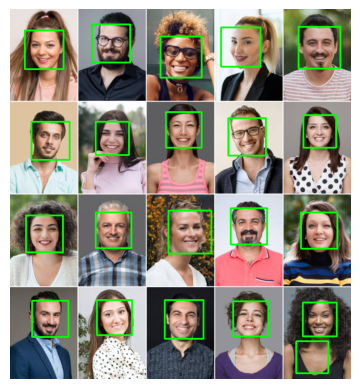

In [ ]:
import cv2                      # OpenCV: biblioteca principal de visão computacional
import matplotlib.pyplot as plt # Exibição de imagens com gráficos
import requests                 # Para baixar imagem da internet
import numpy as np              # Para trabalhar com arrays (imagem em bytes)

url = "https://media.istockphoto.com/id/1256838328/pt/foto/headshot-portraits-of-diverse-smiling-people.jpg?s=612x612&w=0&k=20&c=ylSSWsavHxJCzZdTU-bRSZoCAKqsdgNFT2PwWh2zC2s="

response = requests.get(url)

img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # type: ignore
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") # type: ignore
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) # type: ignore

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # type: ignore # Matplotlib usa RGB
plt.imshow(img_rgb)
plt.axis("off")
plt.show()




# Codigo da Etapa 3:


0: 448x640 12 persons, 1 backpack, 2 umbrellas, 1 handbag, 54.9ms
Speed: 2.4ms preprocess, 54.9ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


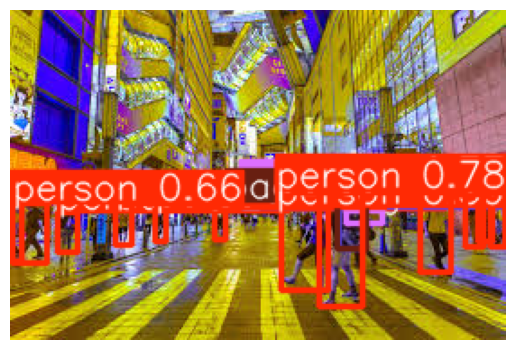

In [3]:
from PIL import Image                    # Trabalhar com imagens no formato PIL
import requests                          # Baixar imagem da internet
from io import BytesIO                   # Manipular dados em bytes
from ultralytics import YOLO             # Importar o modelo YOLOv8
import matplotlib.pyplot as plt          # Para exibir imagens

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEnqLgvl4MYwd--diUst4jEKyHYdNHs3MSVQ&s"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
model = YOLO("yolov8n.pt")
results = model(img)

plt.imshow(results[0].plot())  # Mostra imagem com bounding boxes e rótulos
plt.axis("off")
plt.show()